# Admeteaduse praktika kodutöö
Eesmärk on ennustada telekommunikatsiooni ettevõttest lahkuvaid kliente.

Andmestik: https://www.kaggle.com/datasets/blastchar/telco-customer-churn 

In [167]:
import pandas as pd

# klassifitseerijad
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# mudeli valideerimine
from sklearn.metrics import  accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate

# normaliseerija ja hulgade looja
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# närvivõrk
from keras.layers import Dense, Input
from keras.models import Sequential

# andmete visualiseerimiseks
import seaborn as sns
import matplotlib.pyplot as plt

# Andmete uurimine ja puhastamine

In [168]:
df = pd.read_csv("train.csv")
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Vaatame, mis andmed meil on

In [169]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [171]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Näeme, et on olemas veerud binaarsete andmetega, aga stringi kujul. 
Partner, Dependents, PhoneService...

Siin on kaks võimalust kas loome onehot vektori või vahetame väärtused kasutades pandas.apply meetodit.

Mina asendan kõik värtused kasutades pandas.apply meetodit.

TotalCharges peab olema float kujul, aga tüüp on object, mis tähendab et veerus on olemas string väärtused.

Võime kohe eemaldada customerID, sest kasutaja id ei ole meie jaoks huvitav.

In [172]:
df = df.drop("customerID", axis=1)

In [173]:

# siia salvestame teisendatud andmed
new_df = df.copy()

# kontrollime, kus on olemas binaarväärtused(Yes, No) ja teisendame need arvulisteks väärtusteks.
binary_cols = [col for col in df.columns if len(df[col].value_counts()) == 2]
for col in binary_cols:
    bin_values = df[col].value_counts().index.to_list()
    bin_values_dict = {bin_values[0]: 0, bin_values[1]: 1}
    # replace on deprecated, seega kasutan mapi
    new_df[col] = new_df[col].map(bin_values_dict)

In [174]:
# kontrollime, kus on olemas kolm väärtus ja teisendame need arvulisteks väärtusteks.
trip_cols = [col for col in df.columns if len(df[col].value_counts()) == 3]
for col in trip_cols:
    trip_values = df[col].value_counts().index.to_list()
    trip_values_dict = {trip_values[0]: 0, trip_values[1]: 1, trip_values[2]:2}
    new_df[col] = new_df[col].map(trip_values_dict)

In [175]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,1,2,1,0,1,0,0,0,0,0,0,Electronic check,29.85,29.85,0
1,0,0,0,0,34,0,0,1,1,0,1,0,0,0,2,1,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,Mailed check,53.85,108.15,1
3,0,0,0,0,45,1,2,1,1,0,1,1,0,0,2,1,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,0,1,1,1,0,1,1,1,1,2,0,Mailed check,84.80,1990.5,0
7039,1,0,1,1,72,0,1,0,0,1,1,0,1,1,2,0,Credit card (automatic),103.20,7362.9,0
7040,1,0,1,1,11,1,2,1,1,0,0,0,0,0,0,0,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,0,1,0,0,0,0,0,0,0,0,0,Mailed check,74.40,306.6,1


Nüüd vaatame, mis toimub TotalCharges veeruga

In [176]:
type(df["TotalCharges"][0])

str

Näeme, et tegu on string tüübiga, seega tuleb teisendada arvuks.

In [177]:
# konverteerime kõik väärtused numbriteks
new_df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors='coerce')

In [178]:
# kontrollime, kas nüüd kõik veerud on õiges formaadis, et oleks võimalik neid andmeid kasutada 
# mudeli treenimiseks
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='PaymentMethod'>

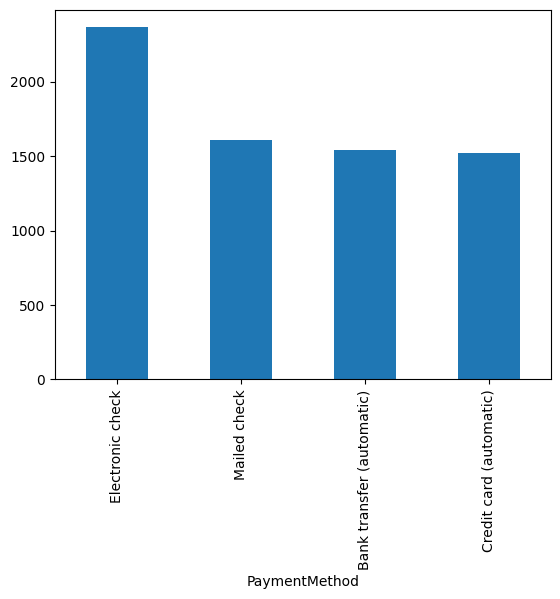

In [179]:
# jäi ainult üks object. Kontrollime.
df["PaymentMethod"].value_counts().plot(kind="bar")

Näeme, et meil on ainult neli väärtust. Võime teha sama manipalutsiooni nagu enne, et teisendada tunnused numbrilisele kujule

In [180]:
payment_method = df["PaymentMethod"].value_counts().index.to_list()
trip_values_dict = {payment_method[0]: 0, payment_method[1]: 1, payment_method[2]:2, payment_method[3]:3}
new_df["PaymentMethod"] = new_df["PaymentMethod"].map(trip_values_dict)

Nüüd kontrollime, kas meil on olemas puuduvaid andmeid.

In [181]:
new_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 väärtust veerus TotalCharges on puudu. Lahenduseks on nende asendamine selle veeru keskmise väärtusega.

In [182]:
new_df['TotalCharges'] = new_df["TotalCharges"].fillna(new_df["TotalCharges"].mean())

Teeme pairplot diagrammi, et näha, kuidas meie andmed paiknevad ruumis. Selleks kasutame järgmisi tunnuseid, kus on palju erinevaid väärtusi: TotalCharges, MonthlyCharges, tenure.

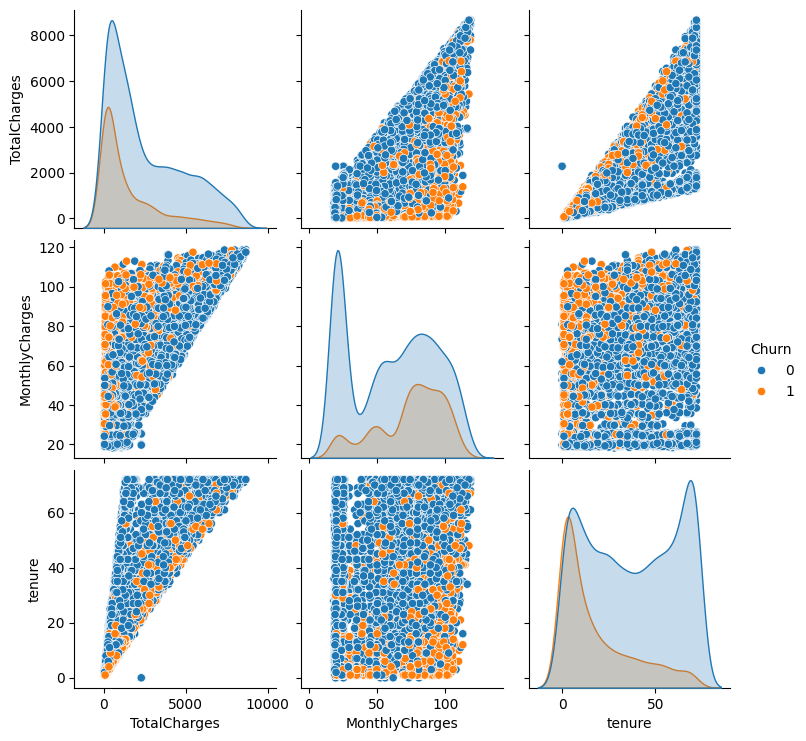

In [183]:
sns.pairplot(new_df[["TotalCharges", "MonthlyCharges", "tenure", "Churn"]], hue="Churn")

Kohe märkame, et klassis 0 on rohkem väärtusi.

<Axes: xlabel='Churn'>

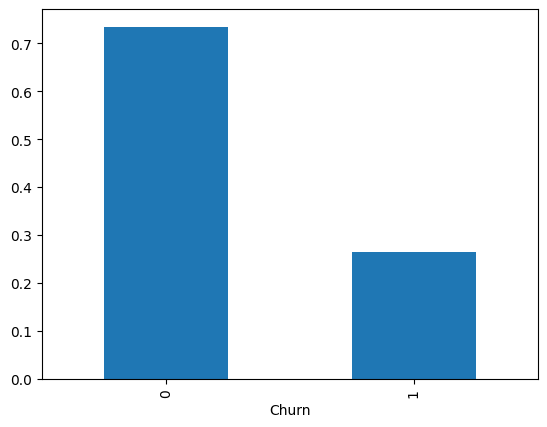

In [184]:
new_df["Churn"].value_counts(normalize=True).plot(kind="bar")

Klassid ei ole tasakaalus. Proovime treenida erinevaid mudeleid, kui klassid on sellised ja pärast proovime teha undersampling-ut. Hetkel kasutame kõik tunnused ära. Võime pärast küsida randomforesti-lt, millised tunnused on kõige olulisemad.

# Eeltöötlus mudeli treenimiseks

In [185]:
X  = new_df.drop(["Churn"], axis=1)
y = new_df["Churn"]
# väärtused, mida soovime normaliseerida
x_num_features = ["TotalCharges", "MonthlyCharges", "tenure"]
scaler = MinMaxScaler()


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=77)
print(X_train.shape)
print(X_test.shape)

# normaliseerime X_train ja X_test valitud tunnused
X_train[x_num_features] = scaler.fit_transform(X_train[x_num_features])
X_test[x_num_features] = scaler.transform(X_test[x_num_features])

(5634, 19)
(1409, 19)


# Mudelite loomine ja treenimine

In [186]:
# salvestame andmed sõnastikku, et hiljem oleks võimalik visualiseerida meie mudelite tulemusi.
accuracy_results = dict()
cvc_results = dict()

# funktsioon, mis teeb ristvalideerimist ja tagastab tulemused
def get_cross_val_results(mdl, X, y):
    cv = 5
    scores = cross_validate(mdl,X,y,cv=cv,scoring=['accuracy'],return_train_score=True)
    return scores["test_accuracy"]

# tagastab kesmise väärtuse massiivi elementide kohta
def avg(arr):
    return sum([score for score in arr]) / len(arr)
# väljastab vajalikud andmed
def display_results(res):
    print(res)
    print(f"Ristvalideerimine Keskmine väärtus: {avg(res)}" )

# get = False, et oleks võimalik kätte saada predicted väärtus.
def save_results(mdl, name, get=False):
    # X_train, y_train, X_test, y_test,cvc_results,accuracy_results  on globaalsed muutujad 
    res = get_cross_val_results(mdl, X_train, y_train)
    cvc_results[name] = avg(res)
    display_results(res)
    mdl.fit(X_train, y_train)

    predicted = mdl.predict(X_test)
    accuracy = accuracy_score(predicted, y_test)
    accuracy_results[name] = accuracy
    print(f"Täpsus test hulgal on {accuracy}")
    if get:
        return predicted



In [187]:
mdl1 = RandomForestClassifier(random_state=77)
predicted = save_results(mdl1, "RandomForestClassifier", get=True)

[0.79591837 0.80124224 0.7826087  0.79946761 0.80017762]
Ristvalideerimine Keskmine väärtus: 0.795882906409919
Täpsus test hulgal on 0.7885024840312278


<Axes: >

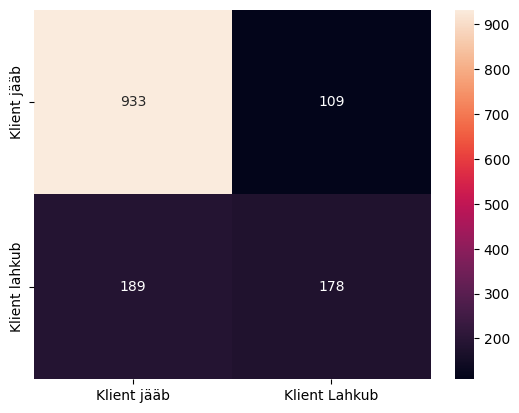

In [188]:
cfm = confusion_matrix(y_test, predicted) 
sns.heatmap(cfm, annot=True, fmt='d',xticklabels=["Klient jääb", "Klient Lahkub"], yticklabels=["Klient jääb", "Klient lahkub"])

Üllatav, et meil on päris suur arv vale negatiivseid. Ootasin, et meil tekkib rohkem vale positiivseid, kuna klassid ei ole tasakaalus ehk 
mudel ennustab valesti kliente, kes tegelikult lahkuvad, arvates, et nad jäävad.😅

In [189]:

mdl2 = LogisticRegression()
save_results(mdl2, "LogisticRegression")
# res = get_cross_val_results(mdl2, X_train, y_train)
# cvc_results["LogisticRegression"] = avg(res)
# display_results(res)
# accuracy = accuracy_score(mdl2.predict(X_test), y_test)
# accuracy_results["LogisticRegression"] = accuracy
# print(accuracy)

[0.81100266 0.80124224 0.80479148 0.79325643 0.81616341]
Ristvalideerimine Keskmine väärtus: 0.8052912446158478
Täpsus test hulgal on 0.7977288857345636


In [190]:

mdl3 = KNeighborsClassifier()
save_results(mdl3, "KNeighborsClassifier")
# res = get_cross_val_results(mdl3, X_train, y_train)
# cvc_results["KNeighborsClassifier"] = avg(res)

# display_results(res)

# accuracy = accuracy_score(mdl3.predict(X_test), y_test)
# accuracy_results["KNeighborsClassifier"] = accuracy
# print(accuracy)


[0.76486247 0.75687666 0.77107365 0.75421473 0.76998224]
Ristvalideerimine Keskmine väärtus: 0.7634019489330987
Täpsus test hulgal on 0.7558552164655784


In [191]:
mdl4 = DecisionTreeClassifier()
save_results(mdl4, "DecisionTreeClassifier")
# res = get_cross_val_results(mdl4, X_train, y_train)
# cvc_results["DecisionTreeClassifier"]
# display_results(res)

# accuracy = accuracy_score(mdl4.predict(X_test), y_test)
# accuracy_results["DecisionTreeClassifier"] = accuracy
# print(accuracy)


[0.72404614 0.71251109 0.75244011 0.73114463 0.74156306]
Ristvalideerimine Keskmine väärtus: 0.7323410049787156
Täpsus test hulgal on 0.7295954577714692


Vaatame, millised tunnused on random foresti järgi kõige olulisemad

<Axes: >

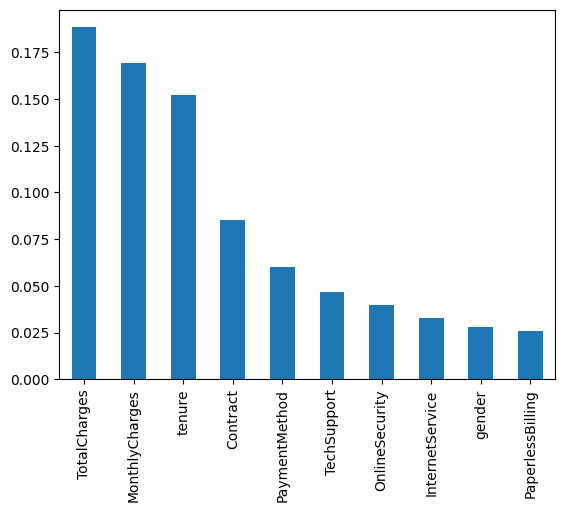

In [192]:
feat_importances = pd.Series(mdl1.feature_importances_, index=new_df.columns[:-1])
feat_importances.nlargest(10).plot(kind='bar')

# Närvivõrk

In [193]:
# loome lihtsa närvivõrgu
mdl5 =  Sequential()
mdl5.add(Dense(200,activation="sigmoid", input_shape=(X.shape[1],)))
mdl5.add(Dense(100,  activation="sigmoid"))
mdl5.add(Dense(50,  activation="sigmoid"))
mdl5.add(Dense(1, activation="sigmoid"))



mdl5.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy"])

mdl5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 200)               4000      
                                                                 
 dense_21 (Dense)            (None, 100)               20100     
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 29201 (114.07 KB)
Trainable params: 29201 (114.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [194]:
hist = mdl5.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, batch_size=8, verbose=True)

Epoch 1/20
705/705 [==============================] - 7s 9ms/step - loss: 0.4705 - accuracy: 0.7755 - val_loss: 0.4506 - val_accuracy: 0.7864
Epoch 2/20
705/705 [==============================] - 6s 9ms/step - loss: 0.4399 - accuracy: 0.7925 - val_loss: 0.4377 - val_accuracy: 0.7935
Epoch 3/20
705/705 [==============================] - 6s 8ms/step - loss: 0.4323 - accuracy: 0.7982 - val_loss: 0.4502 - val_accuracy: 0.7779
Epoch 4/20
705/705 [==============================] - 6s 9ms/step - loss: 0.4277 - accuracy: 0.8003 - val_loss: 0.4430 - val_accuracy: 0.7814
Epoch 5/20
705/705 [==============================] - 6s 8ms/step - loss: 0.4259 - accuracy: 0.8017 - val_loss: 0.4299 - val_accuracy: 0.7984
Epoch 6/20
705/705 [==============================] - 6s 8ms/step - loss: 0.4251 - accuracy: 0.8021 - val_loss: 0.4434 - val_accuracy: 0.7842
Epoch 7/20
705/705 [==============================] - 6s 8ms/step - loss: 0.4241 - accuracy: 0.8019 - val_loss: 0.4287 - val_accuracy: 0.7956
Epoch 

<Axes: >

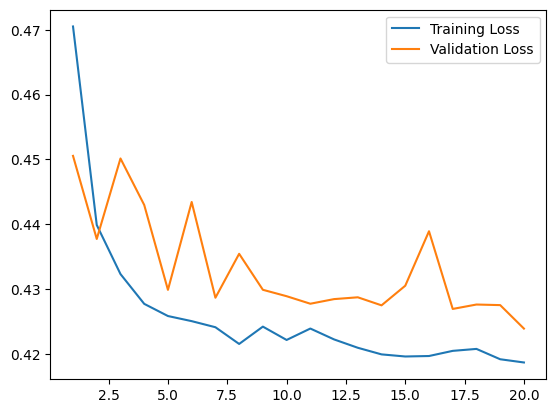

In [195]:
sns.lineplot(x=range(1, len(hist.history["loss"]) + 1), y=hist.history["loss"], label='Training Loss')
sns.lineplot(x=range(1, len(hist.history["val_loss"]) + 1), y=hist.history["val_loss"], label='Validation Loss')

Võime eeldada, et antud närvivõrk saab edasi areneda, kui jätkame treenimist, sest loss ei ole veel 0 ja vaikselt kaheneb.

In [196]:
# salvestame närvivõrgu täpsuse sõnastikku.
accuracy_results["Närvivõrk"] = hist.history["val_accuracy"][-1]

# Klasside tasakalustaamine
Provime teha undersamplig-ut ja võrrelda tulemusi. Midagi erilist ei tee, lihtaslt võtan suurema hulga ja valin nii palju värtusi, kui on vaja et mõlemad klassid oleksid tasakaalus.

In [197]:
majority_class = new_df.loc[new_df["Churn"] == 0]
minority_class = new_df.loc[new_df["Churn"] == 1]

# juhuslikult valime read suuremast klassist ja veendume, et neid on sama palju kui väiksemas klassis
majority = majority_class.sample(n=len(minority_class), replace=False, random_state=1)

In [198]:
undersampled_df = pd.concat([majority, minority_class])

<Axes: xlabel='Churn'>

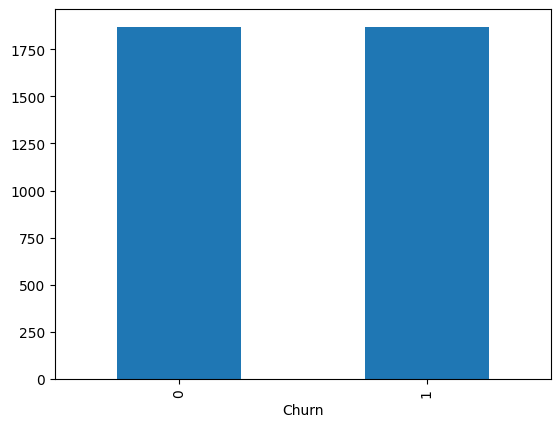

In [199]:
undersampled_df["Churn"].value_counts().plot(kind="bar")

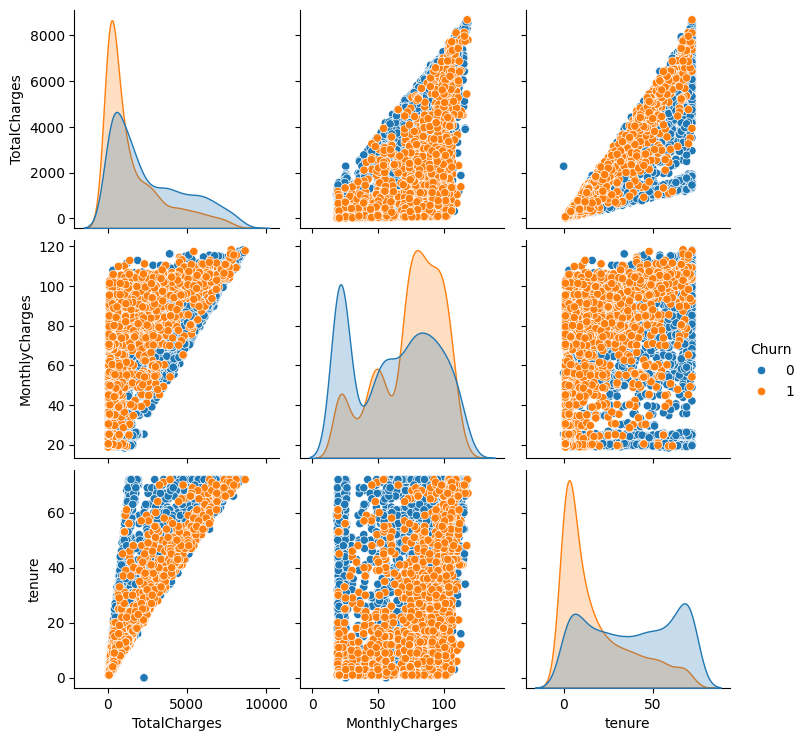

In [200]:
sns.pairplot(undersampled_df[["TotalCharges", "MonthlyCharges", "tenure", "Churn"]], hue="Churn")

In [201]:
# kasutame sama protseduuri nagu varem.
X  = undersampled_df.drop(["Churn"], axis=1)
y = undersampled_df["Churn"]


scaler = MinMaxScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=77)

X_train[x_num_features] = scaler.fit_transform(X_train[x_num_features])
X_test[x_num_features] = scaler.transform(X_test[x_num_features])
print(X_train.shape)
print(X_test.shape)

(2990, 19)
(748, 19)


In [202]:
save_results(mdl1, "RandomForestClassifier-Undersampling")

[0.76086957 0.73578595 0.76923077 0.73244147 0.7541806 ]
Ristvalideerimine Keskmine väärtus: 0.7505016722408027
Täpsus test hulgal on 0.7446524064171123


In [203]:
save_results(mdl2, "LogisticRegression-Undersampling")

[0.79264214 0.75250836 0.79765886 0.74414716 0.75250836]
Ristvalideerimine Keskmine väärtus: 0.7678929765886289
Täpsus test hulgal on 0.7647058823529411


In [204]:
save_results(mdl3, "KNeighborsClassifier-Undersampling")

[0.73411371 0.71237458 0.75250836 0.71404682 0.7173913 ]
Ristvalideerimine Keskmine väärtus: 0.7260869565217392
Täpsus test hulgal on 0.713903743315508


In [205]:
save_results(mdl4, "DecisionTreeClassifier-Undersampling")

[0.69732441 0.6638796  0.65551839 0.68896321 0.69397993]
Ristvalideerimine Keskmine väärtus: 0.679933110367893
Täpsus test hulgal on 0.6577540106951871


In [206]:
mdl5 =  Sequential()
mdl5.add(Dense(200,activation="sigmoid", input_shape=(X.shape[1],)))
mdl5.add(Dense(100,  activation="sigmoid"))
mdl5.add(Dense(50,  activation="sigmoid"))
mdl5.add(Dense(1, activation="sigmoid"))



mdl5.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy"])

mdl5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               4000      
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 1)                 51        
                                                                 
Total params: 29201 (114.07 KB)
Trainable params: 29201 (114.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
hist = mdl5.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, batch_size=8, verbose=True)

Epoch 1/20
374/374 [==============================] - 4s 9ms/step - loss: 0.5857 - accuracy: 0.6896 - val_loss: 0.5262 - val_accuracy: 0.7500
Epoch 2/20
374/374 [==============================] - 3s 8ms/step - loss: 0.5218 - accuracy: 0.7538 - val_loss: 0.5174 - val_accuracy: 0.7473
Epoch 3/20
374/374 [==============================] - 3s 9ms/step - loss: 0.5098 - accuracy: 0.7649 - val_loss: 0.5234 - val_accuracy: 0.7500
Epoch 4/20
374/374 [==============================] - 3s 8ms/step - loss: 0.5036 - accuracy: 0.7645 - val_loss: 0.5131 - val_accuracy: 0.7473
Epoch 5/20
374/374 [==============================] - 3s 8ms/step - loss: 0.5055 - accuracy: 0.7602 - val_loss: 0.5124 - val_accuracy: 0.7513
Epoch 6/20
374/374 [==============================] - 3s 8ms/step - loss: 0.5028 - accuracy: 0.7612 - val_loss: 0.5052 - val_accuracy: 0.7500
Epoch 7/20
374/374 [==============================] - 3s 8ms/step - loss: 0.4985 - accuracy: 0.7716 - val_loss: 0.5253 - val_accuracy: 0.7433
Epoch 

<Axes: >

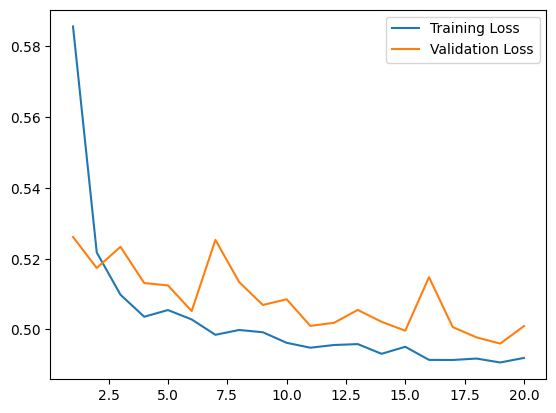

In [208]:
sns.lineplot(x=range(1, len(hist.history["loss"]) + 1), y=hist.history["loss"], label='Training Loss')
sns.lineplot(x=range(1, len(hist.history["val_loss"]) + 1), y=hist.history["val_loss"], label='Validation Loss')

Eelmisel närvivõrgul kaotusfunktsiooni väärtus oli natukene parem.

In [209]:
accuracy_results["Närvivõrk-Undersampling"] = hist.history["val_accuracy"][-1]

# Mudelite võrdlemine

<Axes: >

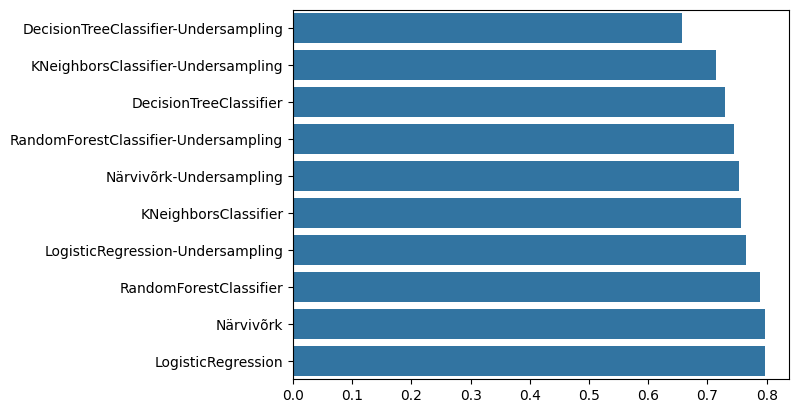

In [210]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
accuracy_results =  dict(sorted(accuracy_results.items(), key=lambda item: item[1]))

labels = list(accuracy_results.keys())
accuracy = [accuracy_results[k] for k in labels]
sns.barplot(x=accuracy, y=labels, orient='h')

## Ristvalideerimise põhjal ilma närvivõrguta

<Axes: >

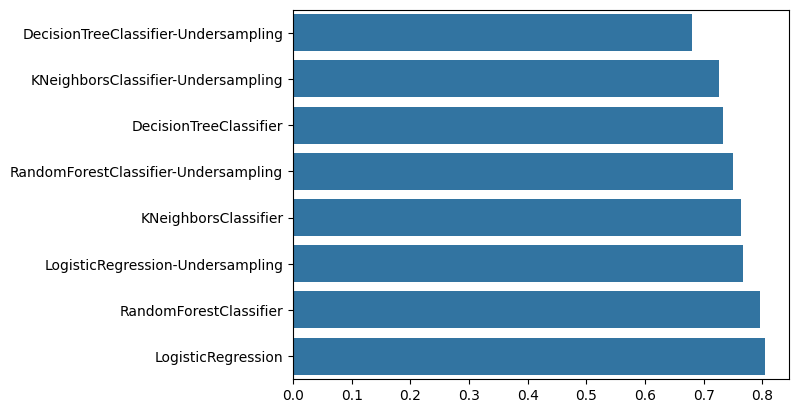

In [211]:
cvc_results =  dict(sorted(cvc_results.items(), key=lambda item: item[1]))

labels = list(cvc_results.keys())
accuracy = [cvc_results[k] for k in labels]
sns.barplot(x=accuracy, y=labels, orient='h')

# Kokkuvõtte

## Tulemused on järgmised
Kui hetkel oleks vaja kohe valida mudel, siis valiksin logistilise regressiooni, mis on treenitud tava andmete hulga põhjal. Selle mudeli täpsus ja ristvalideerimise täpsus on väga kõrge võrreldes teiste mudelitega. Muidugi, mudeli täpsus ei ole ideaalne, ligikaudu 80%.

Kahjus undersampling ei ole aidanud tulemusi parandada.

## Kuidas parandada tulemust?

* Võime proovida erinevaid parameetreid RandomForest-i ja LogisticRegression-i jaoks, et natukene parandada nende mudelite tulemusi.

* Võime proovida jätkata närvivõrku treenimisega , kuna tal on olemas võimalus edasi areneda.

* On võimalik proovida luua uue tunnuse kasutades RandomForest-i tähtsuse tunnuse tulemusi

* Kasutada rohkem tasakaalustatud andmeid, kuid see ei ole selle ülesande jaoks võimalik."
